In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

In [40]:
%run -i simulator.py

In [41]:
p = 3
q = 2
N = 20

simulator = GRDPG(p, q, N)

In [42]:
A = simulator.sample_Beta(1/2, 1)

In [22]:
import networkx as nx

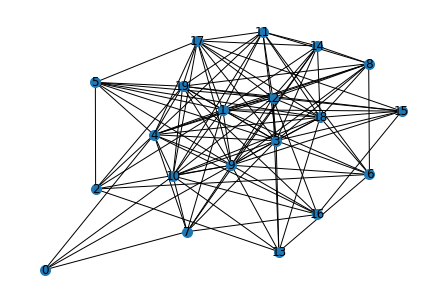

In [44]:
g = nx.from_numpy_matrix(A.numpy(), create_using=nx.DiGraph).to_undirected()
nx.draw(g, node_size=100, with_labels=True)

# Example of simulation from the Block model

In [17]:
%run -i simulator.py

In [44]:
Ncommunities = 5

B = tfp.distributions.Beta(1/2, 2).sample((Ncommunities,Ncommunities))
B = B + 0.5*tf.eye(Ncommunities)

simulator = BlockModel(B)
print(np.round(B.numpy(), 2))

[[1.07 0.   0.02 0.07 0.42]
 [0.08 0.54 0.69 0.65 0.07]
 [0.09 0.39 0.73 0.3  0.14]
 [0.   0.15 0.   0.55 0.43]
 [0.01 0.05 0.47 0.12 0.5 ]]


In [45]:
N = 20
initial_distribution = tfp.distributions.Dirichlet(np.abs(np.random.normal(5, 0.1, Ncommunities))).sample()

E, Correction = simulator.pop_sample(initial_distribution, N, 1, 1/4)
print(E.numpy())
print( Correction.numpy())

[[0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]]
[0.9985129 0.7884255 0.7273819 0.7249028 0.8673783]


In [46]:
A = simulator.sample(E, Correction)

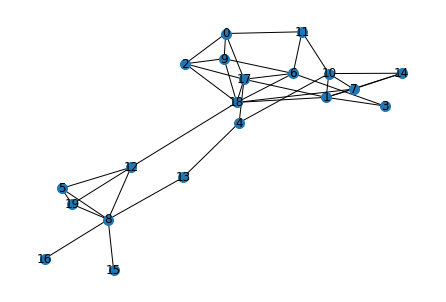

In [47]:
g = nx.from_numpy_matrix(A.numpy(), create_using=nx.DiGraph).to_undirected()
nx.draw(g, node_size=100, with_labels=True)